In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Test/4S-1_info.csv')
data2=pd.read_csv('/content/drive/MyDrive/Machine Learning Test/4S-2_info.csv')
print(data.shape)
print(data.head(10))

(100, 4)
   Cycle      Capa       Endu   Percent
0      1  4.715341  12.155000  0.857335
1      2  4.901805  12.745000  0.891237
2      3  4.890273  12.788333  0.889141
3      4  4.893277  12.786667  0.889687
4      5  4.900183  12.716667  0.890942
5      6  4.897227  12.648333  0.890405
6      7  4.945414  12.976667  0.899166
7      8  4.976928  13.153333  0.904896
8      9  4.843223  12.790000  0.880586
9     10  4.976768  13.213333  0.904867


In [3]:
print(data2.shape)
print(data2.head(10))

(99, 4)
   Cycle      Capa       Endu   Percent
0      1  4.682289  12.005000  0.851325
1      2  4.732128  12.401667  0.860387
2      3  4.816168  12.375000  0.875667
3      4  4.850287  12.593333  0.881870
4      5  4.862128  12.563333  0.884023
5      6  4.780820  12.311667  0.869240
6      7  4.900508  12.815000  0.891001
7      8  4.752922  12.538333  0.864168
8      9  4.881117  12.965000  0.887476
9     10  4.858435  12.985000  0.883352


In [4]:
!cp /content/drive/MyDrive/Machine\ Learning\ Test/NotebookML/lssvr.py /content
from lssvr import LSSVR

In [5]:
data.describe()

,Cycle,Capa,Endu,Percent
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,4.772895,12.118117,0.867799
std,29.011492,0.104864,0.432685,0.019066
min,1.000000,4.456968,11.023333,0.810358
25%,25.750000,4.704660,11.830000,0.855393
50%,50.500000,4.785207,12.080000,0.870038
75%,75.250000,4.846403,12.343750,0.881164
max,100.000000,4.976928,13.213333,0.904896


In [6]:
data2.describe()

,Cycle,Capa,Endu,Percent
count,99.000000,99.000000,99.000000,99.000000
mean,50.000000,4.730785,12.025337,0.860143
std,28.722813,0.085246,0.384103,0.015499
min,1.000000,4.539934,11.141667,0.825442
25%,25.500000,4.682385,11.738333,0.851343
50%,50.000000,4.732021,12.000000,0.860367
75%,74.500000,4.797641,12.229167,0.872298
max,99.000000,4.900508,12.985000,0.891001


In [7]:
data.isnull().sum()

Cycle      0
Capa       0
Endu       0
Percent    0
dtype: int64

In [8]:
data2.isnull().sum()

Cycle      0
Capa       0
Endu       0
Percent    0
dtype: int64

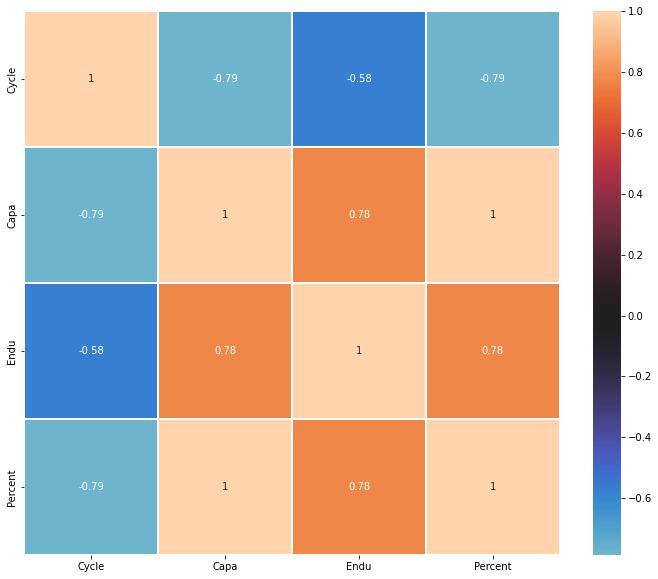

In [9]:
import seaborn as sns
plt.figure(figsize=(12,10)) # Correlation diagram of features  
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, center=0,  annot= True, linewidths=0.5)

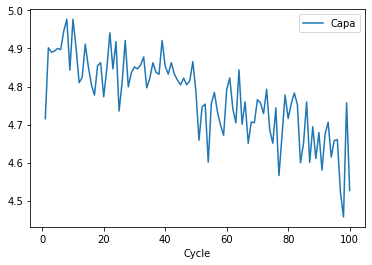

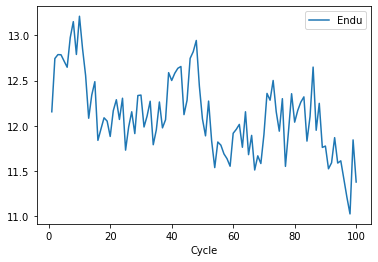

In [10]:
data.plot('Cycle','Capa')
data.plot('Cycle','Endu')

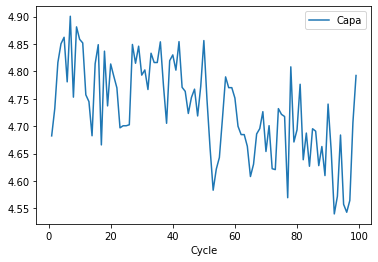

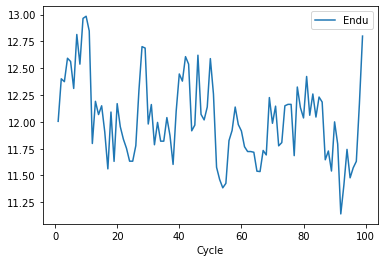

In [11]:
data2.plot('Cycle','Capa')
data2.plot('Cycle','Endu')

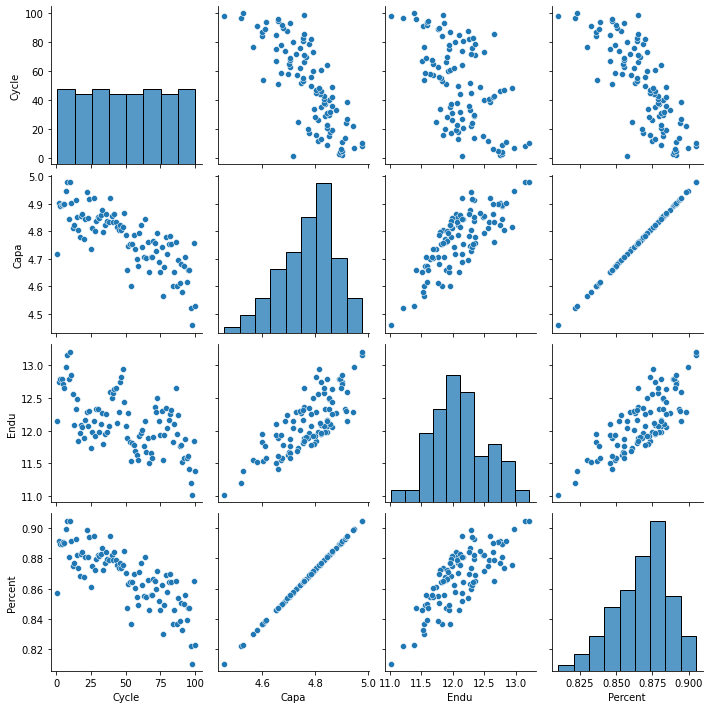

In [12]:
sns.pairplot(data)

In [13]:
# Function to remove outlier
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25) # Q1
    q3 = df_in[col_name].quantile(0.75) # Q3
    iqr = q3-q1 # Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

New_data = remove_outlier(data, 'Capa') # remove oulier
#New_data=data
dataDF =pd.DataFrame(New_data) # target of train set   

In [60]:
dataDF
target=dataDF[['Percent']]
print(target)

     Percent
0   0.857335
1   0.891237
2   0.889141
3   0.889687
4   0.890942
..       ...
94  0.846922
95  0.847331
96  0.822060
98  0.864971
99  0.822985

[99 rows x 1 columns]


In [ ]:
#target=target.to_frame(name='PackVoltx100')

In [61]:
import numpy as np
from numpy import arange
"""New_data = New_data.drop(['Ampsx100','RPM','PackVoltx100'],axis=1)

# function to normalize data
def normalize_data(df):
    for column in df.columns:
      df[column] = df[column]/1000
    return df
def normalize_data2(df):
    for column in df.columns:
      df[column] = df[column]/100
    return df

New_data = normalize_data(New_data)
#source = New_data
#.drop(['PackVoltx100','Ampsx100','RPM'],axis=1)
target=normalize_data2(target)"""

"New_data = New_data.drop(['Ampsx100','RPM','PackVoltx100'],axis=1)\n\n# function to normalize data\ndef normalize_data(df):\n    for column in df.columns:\n      df[column] = df[column]/1000\n    return df\ndef normalize_data2(df):\n    for column in df.columns:\n      df[column] = df[column]/100\n    return df\n\nNew_data = normalize_data(New_data)\n#source = New_data\n#.drop(['PackVoltx100','Ampsx100','RPM'],axis=1)\ntarget=normalize_data2(target)"

In [112]:
X=pd.DataFrame(dataDF[['Cycle']])  #Cycle
y=target    #Percent, endu

Text(0, 0.5, 'Capa in %')

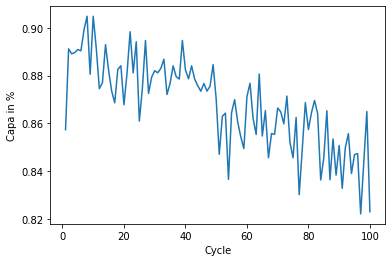

In [113]:
plt.plot(dataDF.Cycle,dataDF.Percent)
plt.xlabel('Cycle')
plt.ylabel('Capa in %')

In [114]:
X2=pd.DataFrame(data2[['Cycle']])
y2=pd.DataFrame(data2[['Percent']])

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import SCORERS

In [117]:
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [118]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Divide the data into 2 train set and test set
X_train=X
y_train=y
X_test=X2
y_test=y2
model_lasso=Lasso(alpha=0.1)
#cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1)
#grid = dict()
#grid['alpha']=arange(0, 1, 0.01)
#search=GridSearchCV(model_lasso, grid, scoring='neg_mean_absolute_percentage_error',cv=cv, n_jobs=-1)
model_lasso.fit(X_train, y_train)
y_predic=model_lasso.predict(X_test)
#results=search.fit(X_train,y_train)

In [68]:
#y_predict=results.predict(X_test)

In [119]:
print('MAPE',mean_absolute_percentage_error(y_test,y_predic))
print('MSE', mean_squared_error(y_test, y_predic))

MAPE 0.01314346993722543
MSE 0.00020951225289786565


In [70]:
print('MAPE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

NameError: ignored

In [120]:
y_predic

array([0.88677106, 0.88639587, 0.88602068, 0.8856455 , 0.88527031,
       0.88489512, 0.88451993, 0.88414474, 0.88376956, 0.88339437,
       0.88301918, 0.88264399, 0.88226881, 0.88189362, 0.88151843,
       0.88114324, 0.88076806, 0.88039287, 0.88001768, 0.87964249,
       0.8792673 , 0.87889212, 0.87851693, 0.87814174, 0.87776655,
       0.87739137, 0.87701618, 0.87664099, 0.8762658 , 0.87589062,
       0.87551543, 0.87514024, 0.87476505, 0.87438987, 0.87401468,
       0.87363949, 0.8732643 , 0.87288911, 0.87251393, 0.87213874,
       0.87176355, 0.87138836, 0.87101318, 0.87063799, 0.8702628 ,
       0.86988761, 0.86951243, 0.86913724, 0.86876205, 0.86838686,
       0.86801167, 0.86763649, 0.8672613 , 0.86688611, 0.86651092,
       0.86613574, 0.86576055, 0.86538536, 0.86501017, 0.86463499,
       0.8642598 , 0.86388461, 0.86350942, 0.86313424, 0.86275905,
       0.86238386, 0.86200867, 0.86163348, 0.8612583 , 0.86088311,
       0.86050792, 0.86013273, 0.85975755, 0.85938236, 0.85900

In [121]:
y_test.Percent

0     0.851325
1     0.860387
2     0.875667
3     0.881870
4     0.884023
        ...   
94    0.828619
95    0.825996
96    0.829906
97    0.855774
98    0.871347
Name: Percent, Length: 99, dtype: float64

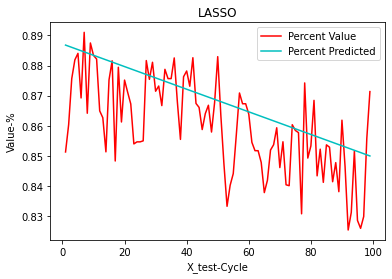

In [129]:
#plt.scatter(y_test,y_predic) # plot to compare y_predicted and y_test
#y_vex1=y_test.Percent
#y_vex2=y_predic
plt.plot(X_test,y_test,'-r',label='Percent Value')
plt.plot(X_test,y_predic,'-c',label='Percent Predicted')
#plt.plot(X_test,y_predic['Percent'],'.b')
plt.xlabel('X_test-Cycle') # assign label for x axis
plt.ylabel('Value-%') # assign label for y axis
plt.title('LASSO') # assign title for diagram
plt.legend()
plt.show()

In [130]:
#X_train_gbt, X_test_gbt, y_train_gbt, y_test_gbt = train_test_split(X, y, test_size=0.2)
X_train_gbt=X
X_test_gbt=X2
y_train_gbt=y
y_test_gbt=y2
model_gbt=GradientBoostingRegressor()
grid_gbt=dict()
grid_gbt['max_depth']=arange(0, 10, 1)
grid_gbt['n_estimators']=(100,200,300,400)
grid_gbt['learning_rate']=arange(0.01, 0.1, 0.01)
'''X_train_gbt=X_train_gbt.reshape(1,-1)
y_train_gbt=y_train_gbt.reshape(1,-1)
X_test_gbt=X_test_gbt.reshape(1,-1)
y_test_gbt=y_test_gbt.reshape(1,-1)'''
#model_gbt=GradientBoostingRegressor(max_depth=2, n_estimators=100,learning_rate=0.01)
#model_gbt.fit(X_train_gbt,y_train_gbt.values.ravel())
search=GridSearchCV(model_gbt, grid_gbt, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
results_gbt=search.fit(X_train_gbt,y_train_gbt)
y_predic_gbt=results_gbt.predict(X_test_gbt)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    t

In [131]:
print('MAPE: %.3f' % results_gbt.best_score_)
print('Config: %s' % results_gbt.best_params_)

MAPE: -0.012
Config: {'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 100}


In [132]:
X_train_gbt

,Cycle
0,1
1,2
2,3
3,4
4,5
...,...
94,95
95,96
96,97
98,99


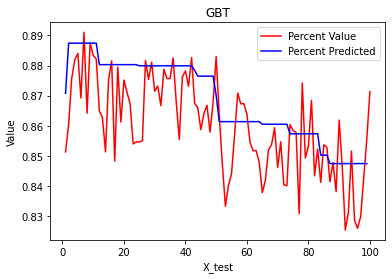

In [137]:
# plot to compare y_predicted and y_test
plt.plot(X_train_gbt,y_test_gbt,'-r',label='Percent Value')
plt.plot(X_test_gbt,y_predic_gbt,'-b',label='Percent Predicted')
plt.xlabel('X_test') # assign label for x axis
plt.ylabel('Value') # assign label for y axis
plt.title('GBT') # assign title for diagram
plt.legend()
plt.show()

In [90]:
print('MAPE',mean_absolute_percentage_error(y_test_gbt,y_predic_gbt))
print('MSE', mean_squared_error(y_test_gbt, y_predic_gbt))

MAPE 0.009229750098069908
MSE 9.466932240045982e-05


In [138]:
#X_train_lssvr,X_test_lssvr,y_train_lssvr,y_test_lssvr= train_test_split(X,y, test_size=0.2)
X_train_lssvr=X
X_test_lssvr=X2
y_train_lssvr=y
y_test_lssvr=y2
model_lssvr=LSSVR(kernel='linear', gamma=2**-4)
model_lssvr.fit(X_train_lssvr,y_train_lssvr)
y_predic_lssvr = model_lssvr.predict(X_test_lssvr)

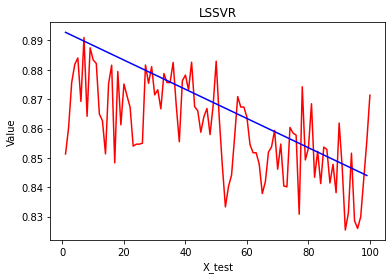

In [139]:
#
plt.plot(X_train_lssvr,y_test_lssvr,'-r')
plt.plot(X_test_lssvr,y_predic_lssvr,'-b')
plt.xlabel('X_test') # assign label for x axis
plt.ylabel('Value') # assign label for y axis
plt.title('LSSVR') # assign title for diagram
plt.show()

In [140]:
print('MAPE',mean_absolute_percentage_error(y_test_lssvr,y_predic_lssvr))
print('MSE', mean_squared_error(y_test_lssvr, y_predic_lssvr))

MAPE 0.0135789229548799
MSE 0.00022782860575602695


In [141]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [152]:
#X_train_mlp,X_test_mlp,y_train_mlp,y_test_mlp=train_test_split(X,y, test_size=0.2)
X_train_mlp=X
X_test_mlp=X2
y_train_mlp=y
y_test_mlp=y2
model_mlp=MLPRegressor(hidden_layer_sizes=(15,15,15),max_iter=100,activation='relu',solver='lbfgs')
model_mlp.fit(X_train_mlp,y_train_mlp.values.ravel())
#.values.ravel()
y_predic_mlp=model_mlp.predict(X_test_mlp)

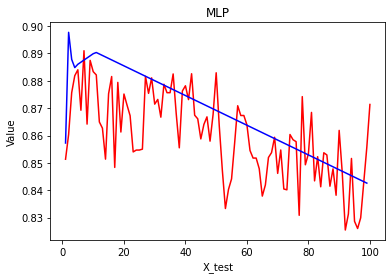

In [153]:

#
plt.plot(X_train_gbt,y_test_mlp,'-r')
plt.plot(X_test_gbt,y_predic_mlp,'-b')
plt.xlabel('X_test') # assign label for x axis
plt.ylabel('Value') # assign label for y axis
plt.title('MLP') # assign title for diagram
plt.show()

In [154]:
print('MAPE',mean_absolute_percentage_error(y_test_mlp,y_predic_mlp))
print('MSE', mean_squared_error(y_test_mlp, y_predic_mlp))

MAPE 0.013563994218961196
MSE 0.00022761419247560206


In [155]:
gtktra=([[300]])
y_ktra=model_mlp.predict(gtktra)
print(y_ktra)

[0.73348194]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
